In [116]:
#importing all the necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import glob
%matplotlib inline


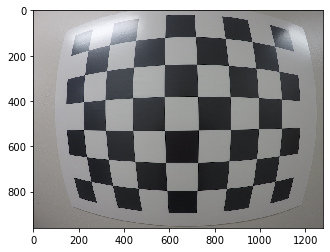

In [117]:
#read the image
img = mpimg.imread('GOPR0034.jpg')
plt.imshow(img)

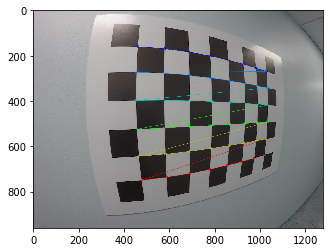

In [122]:
%matplotlib qt
%matplotlib inline
## Arrays to store object points and image points from all the images.
obj_pts = [] #3-D points
img_pts = [] #2-D points
x = 8
y = 6
objp = np.zeros([x*y,3],dtype = np.float32)
objp[:,:2] = np.mgrid[0:x,0:y].T.reshape(-1,2)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (x,y),  flags=cv2.CALIB_CB_ADAPTIVE_THRESH
                                                + cv2.CALIB_CB_EXHAUSTIVE)
cv2.drawChessboardCorners(img,(x,y),corners,ret)
obj_pts.append(objp)
img_pts.append(corners)        
cv2.drawChessboardCorners(img,(x,y),corners,ret)
    
plt.imshow(img)
#print(corners)

In [119]:
%matplotlib qt
obj_pts = []
img_pts = []

x = 8
y = 6

objp = np.zeros([x*y,3],dtype = np.float32)
objp[:,:2] = np.mgrid[0:x,0:y].T.reshape(-1,2)

for idx, path in enumerate(glob.glob('/home/lavanya/self_driving_cars_udacity/checkerboard/GOPR*.jpg')): 
    img = cv2.imread(path)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    try: 
        ret, corners = cv2.findChessboardCorners(gray, (x,y), None)
        
        if ret == True:
            obj_pts.append(objp)
            img_pts.append(corners)
            
            cv2.drawChessboardCorners(img,(x,y),corners,ret)
            cv2.imshow('img',img)
            cv2.waitKey(500)
    except:
        print('image not found')
                   
cv2.destroyAllWindows()
            
        

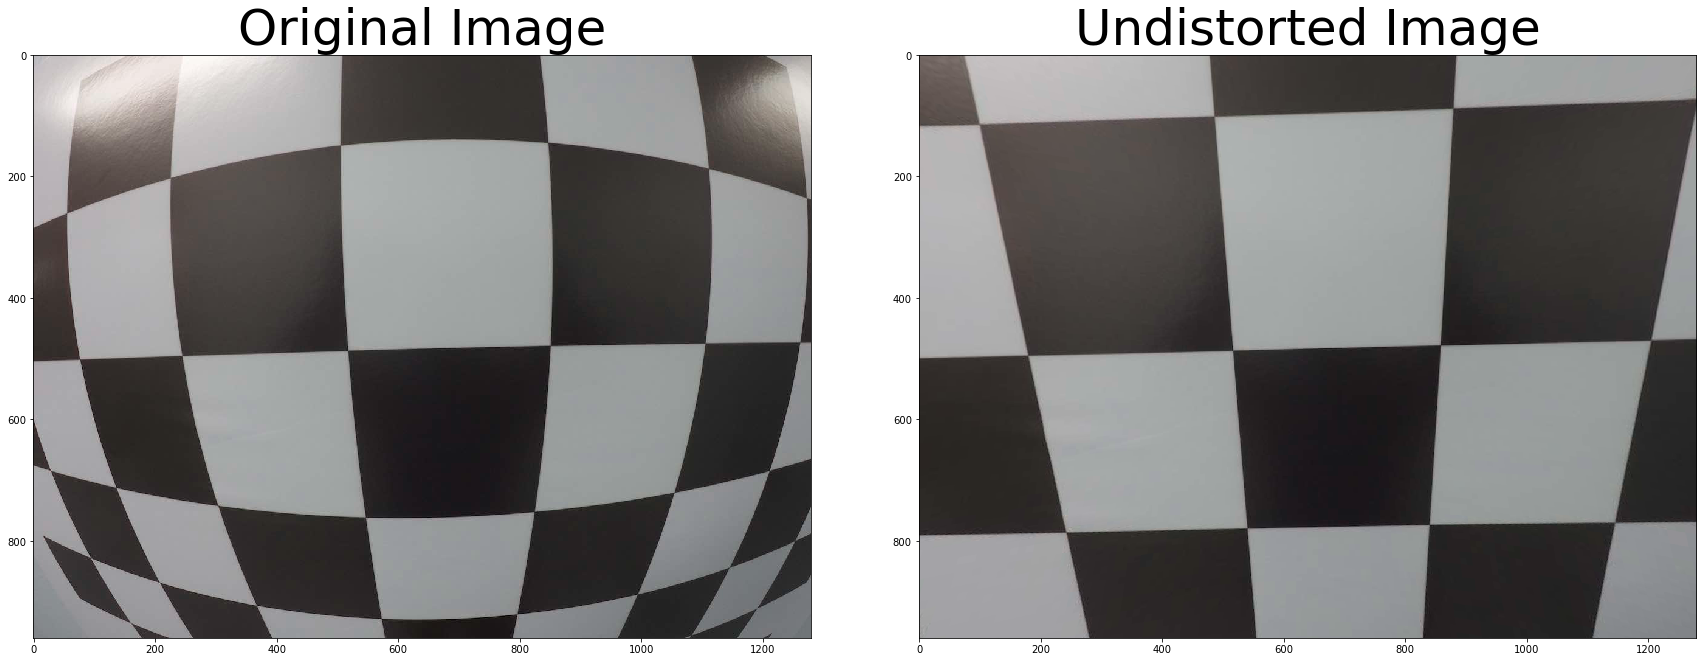

In [121]:
%matplotlib inline
#step 1 calibration  -  will give camera matrix, distortion coefficients, rotation and translation vectors .
#step 2 undistortion -  undistort the image by taking camera matrix and distortion coefficient as inputs
def camera_calibration(img, obj_pts, img_pts):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, mtx, dst, rvec , tvec = cv2.calibrateCamera(obj_pts, img_pts, gray.shape[::-1], None, None)
    distortion = cv2.undistort(img, mtx, dst, None, mtx)
    return distortion
test_img = cv2.imread('test_image.png')
distorted_img = camera_calibration(test_img, obj_pts, img_pts)

#plot the values

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(test_img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(distorted_img)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()